In [2]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

data = X
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data["target"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X)

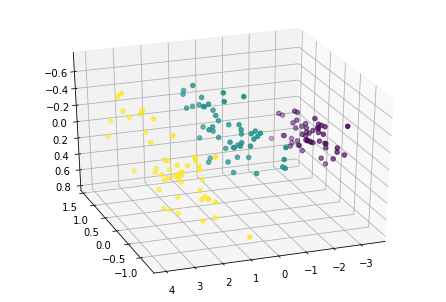

In [29]:
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=data["target"])

<hr>

## Plotting scatter plot using seaborn

<hr>

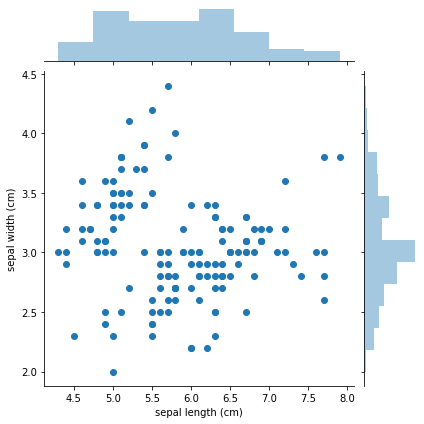

In [31]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=data)

In [32]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [37]:
data["species"] = data["target"].map({
    0 : iris.target_names[0],
    1 : iris.target_names[1],
    2 : iris.target_names[2]
})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<hr>

## Plotting Labelled data using FacetGrid

<hr>

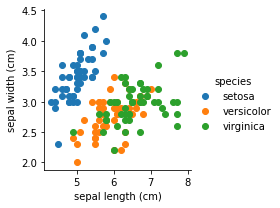

In [39]:
sns.FacetGrid(data, hue="species").map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

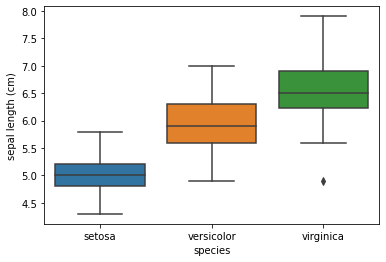

In [40]:
sns.boxplot(x="species", y="sepal length (cm)", data=data)

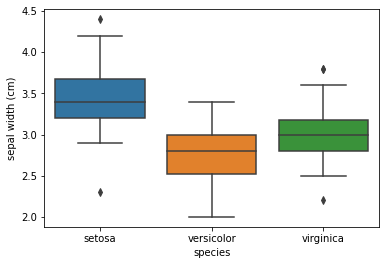

In [41]:
sns.boxplot(x="species", y="sepal width (cm)", data=data)

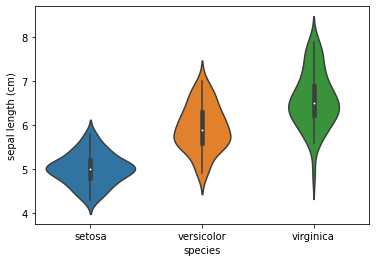

In [42]:
sns.violinplot(x="species", y="sepal length (cm)", data=data)

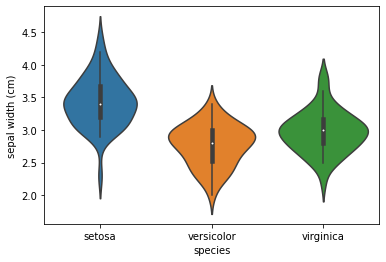

In [43]:
sns.violinplot(x="species", y="sepal width (cm)", data=data)

<hr>

## Plotting all possible combinations

<hr>

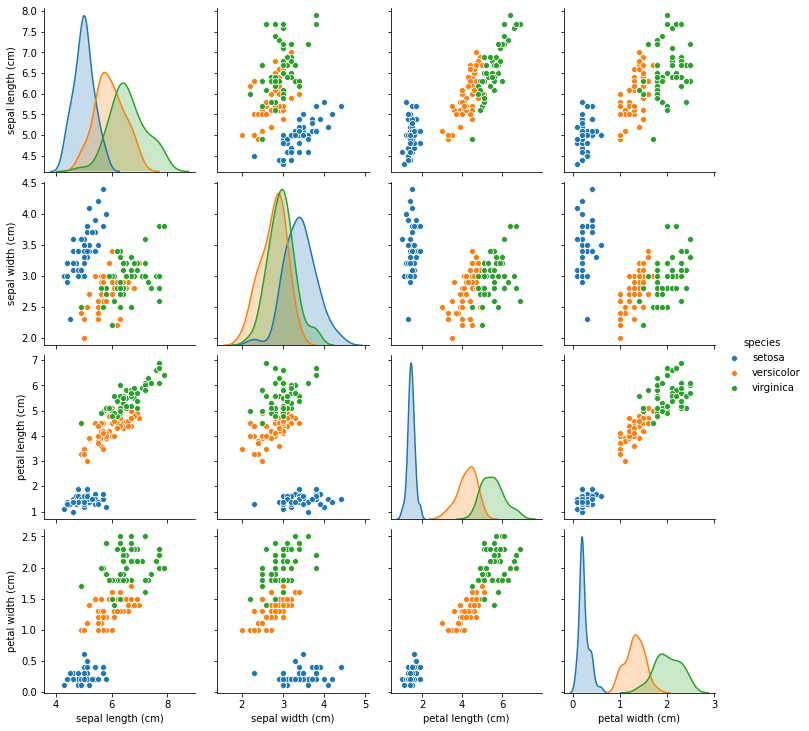

In [44]:
sns.pairplot(data.drop("target",axis=1),hue="species")

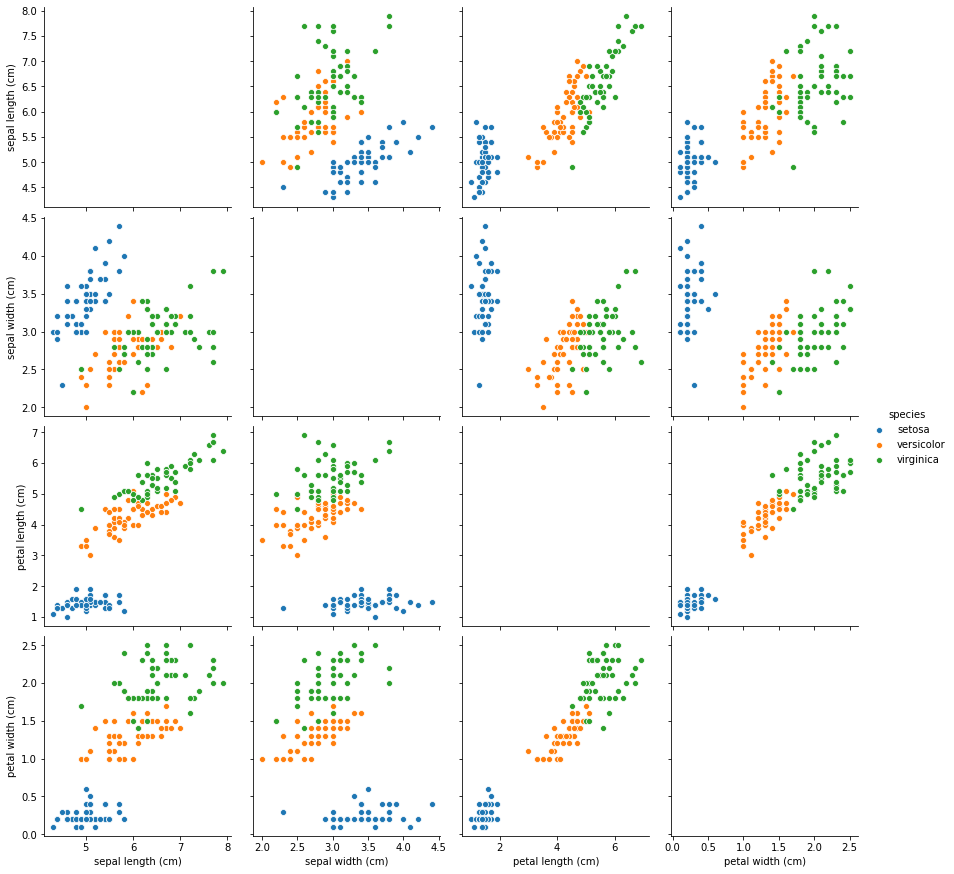

In [48]:
sns.pairplot(data.drop("target", axis=1), hue="species", height=3, diag_kind="bar")